# 1. Load & Preview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/assignment_employee_survey.csv')

In [ ]:
df.shape

(2766, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   emp_id                   2766 non-null   int64  
 1   gender                   2766 non-null   object 
 2   age                      2766 non-null   int64  
 3   marital_status           2766 non-null   object 
 4   job_level                2766 non-null   object 
 5   experience               2766 non-null   int64  
 6   dept                     2766 non-null   object 
 7   emp_type                 2766 non-null   object 
 8   wlb                      2766 non-null   int64  
 9   work_env                 2766 non-null   int64  
 10  physical_activity_hours  2766 non-null   float64
 11  workload                 2766 non-null   int64  
 12  stress                   2766 non-null   int64  
 13  sleep_hours              2766 non-null   float64
 14  commute_mode            

In [ ]:
df.sample(n=10, random_state=42)

,emp_id,gender,age,marital_status,job_level,experience,dept,emp_type,wlb,work_env,physical_activity_hours,workload,stress,sleep_hours,commute_mode,commute_distance,num_companies,team_size,num_reports,edu_level,have_ot,training_hours_per_year,job_satisfaction
1378,2635,Female,23,Single,Junior,1,IT,Full-Time,4,2,2.5,1,2,6.4,Bike,7,0,6,0,High School,False,20.5,4
839,957,Male,47,Married,Mid,25,IT,Full-Time,4,2,2.0,1,3,7.0,Public Transport,26,8,15,0,Bachelor,True,42.5,3
2163,518,Female,34,Married,Senior,12,HR,Full-Time,2,3,0.2,5,1,7.4,Car,8,4,16,4,Master,True,46.0,3
2618,1909,Female,47,Married,Lead,25,Finance,Contract,4,3,1.7,1,1,7.4,Car,16,8,25,2,Bachelor,False,62.5,5
927,2625,Female,36,Married,Mid,14,Operations,Part-Time,1,2,2.0,4,1,7.0,Bike,3,4,12,0,Bachelor,False,37.0,3
450,1808,Female,27,Single,Junior,5,Legal,Full-Time,5,5,2.8,2,2,6.7,Bike,7,1,10,0,Bachelor,True,22.5,4
368,1532,Male,35,Single,Senior,13,Finance,Full-Time,4,3,3.3,1,1,5.7,Public Transport,25,4,15,5,Bachelor,False,46.5,4
1135,1102,Male,22,Single,Junior,0,IT,Full-Time,2,1,0.6,3,1,6.3,Public Transport,8,0,9,0,Bachelor,True,20.0,1
1756,355,Male,25,Single,Mid,3,Sales,Full-Time,3,2,1.6,2,4,7.7,Public Transport,17,1,14,0,Master,False,31.5,4
296,468,Male,22,Single,Junior,0,IT,Part-Time,4,3,0.1,4,1,9.3,Walk,1,0,10,0,Bachelor,True,20.0,4


# 2. Data Pre-Processing

In [ ]:
#null
df.isnull().sum()

,0
emp_id,0
gender,0
age,0
marital_status,0
job_level,0
experience,0
dept,0
emp_type,0
wlb,0
work_env,0


In [ ]:
#duplicate
df.duplicated().sum()

np.int64(0)

In [ ]:
#duplicate
len(df.drop_duplicates())/len(df)

1.0

In [ ]:
#outlier
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  outlier_count = len(outliers)
  outlier_percentage = outlier_count / len(df) * 100
  print(f"Outliers in {col}: {outlier_count} ({outlier_percentage:.2f}%)")

Outliers in emp_id: 0 (0.00%)
Outliers in age: 0 (0.00%)
Outliers in experience: 0 (0.00%)
Outliers in wlb: 0 (0.00%)
Outliers in work_env: 0 (0.00%)
Outliers in physical_activity_hours: 6 (0.22%)
Outliers in workload: 0 (0.00%)
Outliers in stress: 232 (8.39%)
Outliers in sleep_hours: 13 (0.47%)
Outliers in commute_distance: 0 (0.00%)
Outliers in num_companies: 0 (0.00%)
Outliers in team_size: 0 (0.00%)
Outliers in num_reports: 0 (0.00%)
Outliers in training_hours_per_year: 0 (0.00%)
Outliers in job_satisfaction: 388 (14.03%)


# 3. Exploratory Data Analysis

## 1. Distribusi Job Satisfaction secara keseluruhan

/tmp/ipython-input-19-2714170234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='job_satisfaction', palette='viridis')


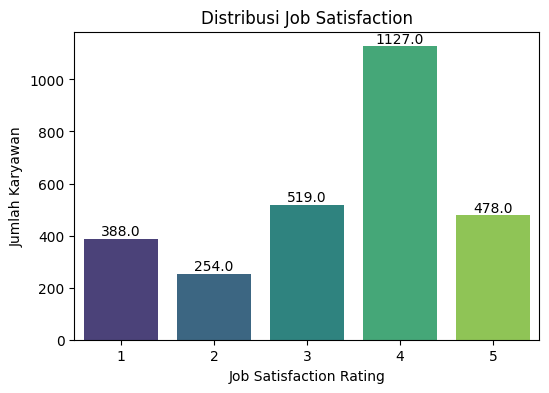

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='job_satisfaction', palette='viridis')

#show label
for p in plt.gca().patches:
  plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribusi Job Satisfaction')
plt.xlabel('Job Satisfaction Rating')
plt.ylabel('Jumlah Karyawan')
plt.show()

- Sebagian besar karyawan memberikan rating 4 terhadap kepuasan kerja mereka (40.7% dari total).

- Rating 5 juga cukup tinggi (17.3%), menunjukkan sebagian merasa sangat puas.

- Sementara itu, rating rendah (1–2) cukup sedikit secara proporsi (~23%), namun tetap perlu perhatian sebagai sinyal ketidakpuasan.

## 2. Job Satisfaction menurut Department

/tmp/ipython-input-27-1888489997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='dept', y='job_satisfaction', palette='Set2')


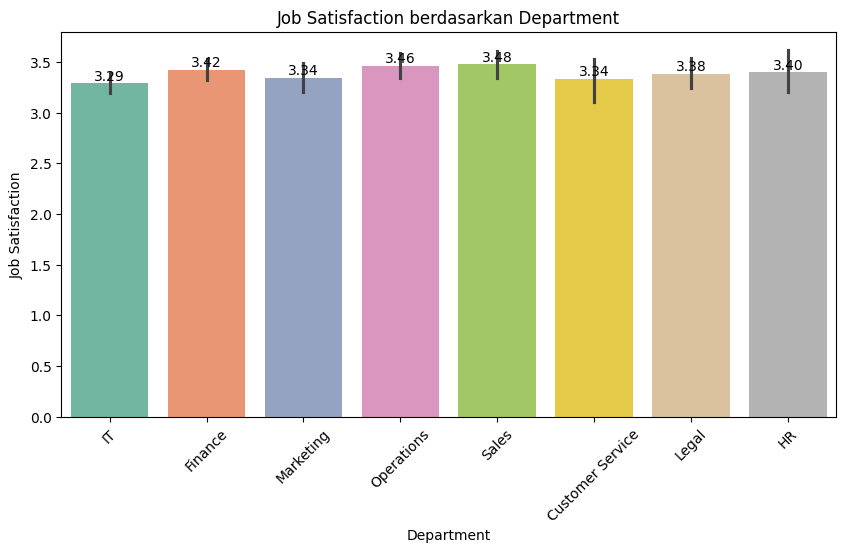

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='dept', y='job_satisfaction', palette='Set2')

#show label
for p in plt.gca().patches:
  plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0,5), textcoords='offset points')


plt.title('Job Satisfaction berdasarkan Department')
plt.xticks(rotation=45)
plt.xlabel('Department')
plt.ylabel('Job Satisfaction')
plt.show()

- Departemen IT memiliki rata-rata job satisfaction tertinggi (3.79), disusul oleh Operations (3.76) dan Legal (3.68).

- HR (3.40) dan Finance (3.42) memiliki nilai rata-rata yang lebih rendah dibanding departemen lain.

- Perbedaan antar departemen relatif kecil, tapi tetap bisa jadi sinyal kebutuhan intervensi lokal di unit tertentu.

## 3. job_level vs Job Satisfaction

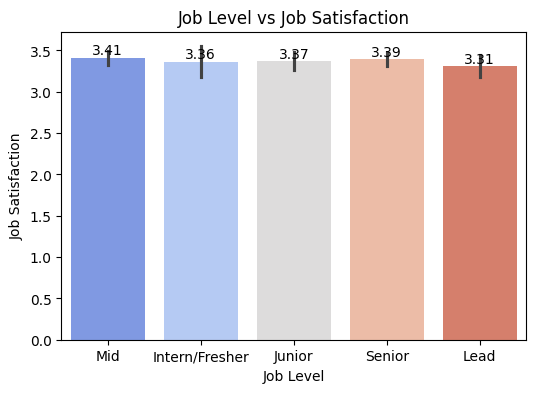

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='job_level', y='job_satisfaction', palette='coolwarm')

#show label
for p in plt.gca().patches:
  plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                               ha='center', va='center', xytext=(0,5), textcoords='offset points')


plt.title('Job Level vs Job Satisfaction')
plt.xlabel('Job Level')
plt.ylabel('Job Satisfaction')
plt.show()

- Karyawan dengan job_level "Mid" cenderung memiliki kepuasan lebih tinggi (3.41) dibanding "Intern/Fresher" (3.16) dan "Lead" (3.11).

- Ini menunjukkan keseimbangan job_level mungkin jadi kontributor penting terhadap kepuasan kerja, terutama bagi karyawan level menengah.

## 4. Marital Status vs Job Satisfaction

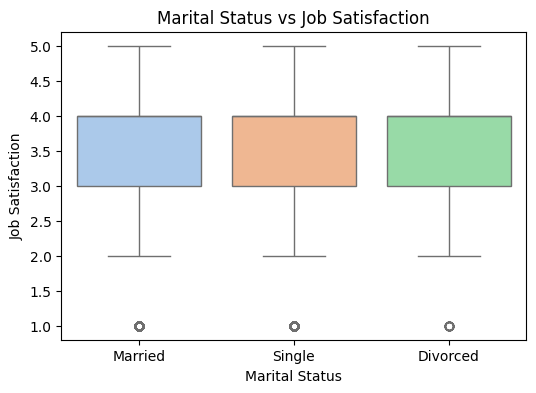

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='marital_status', y='job_satisfaction', palette='pastel')

plt.title('Marital Status vs Job Satisfaction')
plt.xlabel('Marital Status')
plt.ylabel('Job Satisfaction')
plt.show()

- Secara umum, rata-rata job satisfaction antar status pernikahan relatif mirip.

- Namun, karyawan Married cenderung memiliki sedikit kecenderungan lebih tinggi dalam tingkat kepuasan kerja dibanding Single dan Divorced.

- Persebaran nilai juga relatif stabil di ketiga kelompok, tanpa outlier ekstrem yang dominan.

- Hal ini menunjukkan bahwa status pernikahan bukan faktor utama, namun tetap bisa menjadi pertimbangan dalam memahami kebutuhan keseimbangan kerja.

## 5. Employee Type vs Job Satisfaction

/tmp/ipython-input-36-1551068174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='emp_type', y='job_satisfaction', palette='muted')


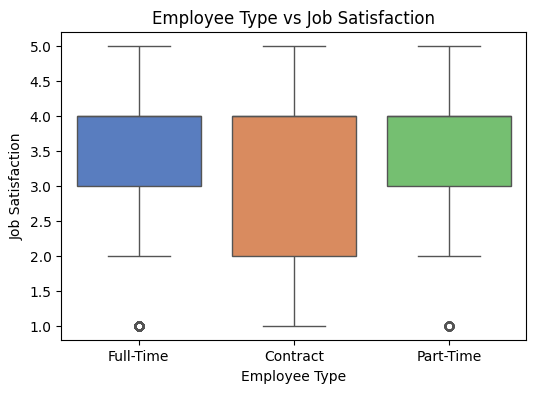

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='emp_type', y='job_satisfaction', palette='muted')
plt.title('Employee Type vs Job Satisfaction')
plt.xlabel('Employee Type')
plt.ylabel('Job Satisfaction')
plt.show()

- Rata-rata job satisfaction mirip di antara ketiga tipe kerja (Full-Time, Contract, Part-Time), namun:

  - Contract employees menunjukkan variasi distribusi lebih lebar (terlihat dari boxplot).

- Ini bisa menunjukkan ketidakpastian atau perbedaan pengalaman antar pekerja kontrak.